# Fireball and Bolide Reports

The following code imports the libraries used to fill in missing data in the table.

In [89]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [90]:
data = pd.read_csv("data/Fireball_And_Bolide_Reports.csv")

The data listed in the csv file is shown below.

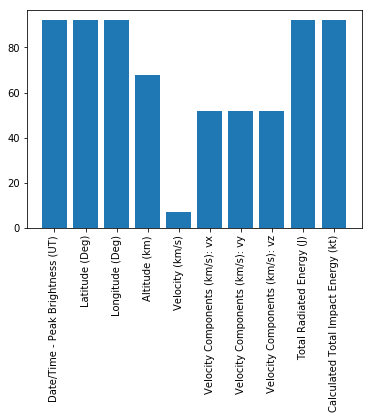

In [63]:
dc = list(data.columns)

count = data.count()

values = []
for c in count:
    values.append(c)

y_pos = np.arange(len(dc))

plt.bar(y_pos, values)
plt.xticks(y_pos, dc, rotation=90)

plt.show()    

Converting Data Frame to a Numpy Array.

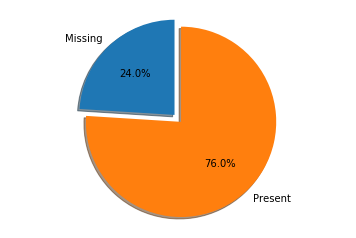

In [64]:
perc_m = (100*((max(values)*len(dc)) - sum(values)))/(max(values)*len(dc))
perc_e = 100-perc_m


labels = 'Missing', 'Present'
sizes = [perc_m, perc_e]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [66]:
data1 = pd.DataFrame(data).to_numpy()

Create the ImperativeImputer model, a multivariate imputer that estimates each feature from all the others.
A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [67]:
imp = IterativeImputer(max_iter = 10, random_state = 0)

imp.fit(data1[:, 3:])

NameError: name 'IterativeImputer' is not defined

Defines a value for blank fields based on the analysis of filled-in fields.

In [68]:
X_test = data1[:, 3:]
data3 = np.round(imp.transform(X_test))
data3

array([[ 3.80e+01,  3.20e+01,  3.00e+00, -1.70e+01, -2.70e+01,  1.00e+13,
         1.80e+01],
       [ 3.60e+01,  2.50e+01, -1.10e+01, -8.00e+00,  1.20e+01,  1.39e+11,
         0.00e+00],
       [ 4.40e+01,  1.80e+01,  1.40e+01,  5.00e+00,  6.00e+00,  3.09e+11,
         1.00e+00],
       [ 2.20e+01,  1.60e+01, -2.00e+00,  6.00e+00,  1.60e+01,  3.82e+12,
         8.00e+00],
       [ 2.60e+01,  1.70e+01,  1.20e+01, -3.00e+00, -2.00e+00,  3.30e+10,
         0.00e+00],
       [ 3.20e+01,  2.10e+01,  1.00e+00, -3.00e+00, -1.00e+00,  7.30e+10,
         0.00e+00],
       [ 2.90e+01,  2.00e+01,  1.00e+00, -3.00e+00, -2.00e+00,  3.40e+10,
         0.00e+00],
       [ 3.90e+01,  2.90e+01, -2.80e+01,  3.00e+00,  5.00e+00,  3.30e+10,
         0.00e+00],
       [ 3.90e+01,  2.30e+01,  1.00e+00, -3.00e+00, -1.00e+00,  7.20e+10,
         0.00e+00],
       [ 2.40e+01,  1.80e+01,  2.00e+00,  2.00e+00, -1.10e+01,  6.40e+10,
         0.00e+00],
       [ 3.20e+01,  2.10e+01,  1.00e+00, -3.00e+00, -1.00e+0

In [60]:
data.columns

Index(['Date/Time - Peak Brightness (UT)', 'Latitude (Deg)', 'Longitude (Deg)',
       'Altitude (km)', 'Velocity (km/s)', 'Velocity Components (km/s): vx',
       'Velocity Components (km/s): vy', 'Velocity Components (km/s): vz',
       'Total Radiated Energy (J)', 'Calculated Total Impact Energy (kt)'],
      dtype='object')

Concatenation of the part with modified data and the part with data that was already completely filled.

In [77]:
data4 = np.concatenate((data1[:, :3], data3), axis=1)

data5 = pd.DataFrame(data=data4,
                    columns=data.columns)

data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
Date/Time - Peak Brightness (UT)       92 non-null object
Latitude (Deg)                         92 non-null object
Longitude (Deg)                        92 non-null object
Altitude (km)                          92 non-null object
Velocity (km/s)                        92 non-null object
Velocity Components (km/s): vx         92 non-null object
Velocity Components (km/s): vy         92 non-null object
Velocity Components (km/s): vz         92 non-null object
Total Radiated Energy (J)              92 non-null object
Calculated Total Impact Energy (kt)    92 non-null object
dtypes: object(10)
memory usage: 7.3+ KB


As a consequence of the concatenation, the table columns have all been transformed into non-null object and thus it is necessary to convert back to the original types.

In [ ]:
convert = ['Altitude (km)',
           'Velocity (km/s)',
           'Velocity Components (km/s): vx',
          'Velocity Components (km/s): vy',
          'Velocity Components (km/s): vz',
          'Total Radiated Energy (J)', 
          'Calculated Total Impact Energy (kt)']

data5[convert] = data5[convert].apply(pd.to_numeric)

data5.astype({'Total Radiated Energy (J)': 'int64'}).dtypes

data5.info()

In [87]:
data5.corr()

,Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
Altitude (km),1.000000,0.628922,-0.279122,0.001983,0.010383,-0.146868,-0.155159
Velocity (km/s),0.628922,1.000000,-0.598226,-0.550091,-0.259398,-0.056752,-0.059404
Velocity Components (km/s): vx,-0.279122,-0.598226,1.000000,-0.071825,-0.130064,0.163155,0.170910
Velocity Components (km/s): vy,0.001983,-0.550091,-0.071825,1.000000,0.228595,-0.127386,-0.128682
Velocity Components (km/s): vz,0.010383,-0.259398,-0.130064,0.228595,1.000000,-0.024915,-0.030720
Total Radiated Energy (J),-0.146868,-0.056752,0.163155,-0.127386,-0.024915,1.000000,0.999349
Calculated Total Impact Energy (kt),-0.155159,-0.059404,0.170910,-0.128682,-0.030720,0.999349,1.000000
